<a href="https://colab.research.google.com/github/saketlakhotia17/Covid19_Prediction_and_Analysis/blob/main/Covid_19_Viz_and_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import requests
import numpy as np
import folium
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df_india_test = pd.json_normalize(requests.get('https://api.rootnet.in/covid19-in/stats/testing/history').json()['data']).rename(columns = {"totalIndividualsTested":"c_individualtest","totalPositiveCases":"c_positive","totalSamplesTested":"c_tests"})

In [ ]:
df_india_test

,day,c_tests,c_individualtest,c_positive,source
0,2020-03-12,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2020-03-18,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,2020-03-19,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,2020-03-20,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,2020-03-21,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf
...,...,...,...,...,...
312,2021-01-25,192337117.0,NaN,NaN,http://twitter.com/ICMRDELHI/status/1353543219...
313,2021-01-26,193062694.0,NaN,NaN,https://twitter.com/ICMRDELHI/status/135390518...
314,2021-01-27,193613120.0,NaN,NaN,https://twitter.com/ICMRDELHI/status/135427359...
315,2021-01-28,194338773.0,NaN,NaN,https://twitter.com/ICMRDELHI/status/135463408...


In [ ]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
df_india = pd.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")

In [ ]:
df_india.head()

,confirmed,recovered,deaths,active
state,,,,
Maharashtra,1648665,1470660,43348,134137
Andhra Pradesh,808924,773548,6606,28770
Karnataka,805947,719558,10947,75423
Tamil Nadu,711713,671489,10956,29268
Uttar Pradesh,472068,438512,6902,26654


In [ ]:
total = df_india.sum()
total.name = "Total"
df_t = pd.DataFrame(total,dtype=float).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["deaths"]/df_t["confirmed"],2)
df_t.style.background_gradient(cmap='Purples',axis=1)

,confirmed,recovered,deaths,active,Mortality Rate (per 100)
Total,7945975.000000,7198877.000000,119538.000000,626192.000000,1.500000


In [ ]:
df_india["Mortality Rate (per 100)"]= np.round(np.nan_to_num(100*df_india["deaths"]/df_india["confirmed"]),2)
df_india.style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Blues',subset=["active"])\
                        .background_gradient(cmap='gist_rainbow',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}",subset=["Mortality Rate (per 100)"])

,confirmed,recovered,deaths,active,Mortality Rate (per 100)
state,,,,,
Maharashtra,1648665,1470660,43348,134137,2.63
Andhra Pradesh,808924,773548,6606,28770,0.82
Karnataka,805947,719558,10947,75423,1.36
Tamil Nadu,711713,671489,10956,29268,1.54
Uttar Pradesh,472068,438512,6902,26654,1.46
Delhi,359488,327390,6312,25786,1.76
Kerala,397218,302017,1353,93745,0.34
West Bengal,353822,310086,6546,37190,1.85
Odisha,282695,266105,1312,15278,0.46


In [ ]:
# Adding Location data (Latitude,Longitude)
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]    
}
df_india["Lat"] = ""
df_india["Long"] = ""

for index in df_india.index :
    if index in locations:
        df_india.loc[df_india.index == index,"Lat"] = locations[index][0]
        df_india.loc[df_india.index == index,"Long"] = locations[index][1]
    else:
        df_india.drop([index],inplace=True)

In [ ]:
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=5,height=800,width="90%")
for i in range(0,len(df_india[df_india['confirmed']>0].index)):
    folium.Circle(
        location=[df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_india.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_india.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(df_india.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(df_india.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(df_india.iloc[i]['deaths'])+"</li>"+
        
        "<li>Mortality Rate:   "+str(np.round(df_india.iloc[i]['Mortality Rate (per 100)'],2))+"</li>"+
        "</ul>"
        ,
        radius=(int(np.log2(df_india.iloc[i]['confirmed']+1)))*15000,
        color='#008B8B',
        fill_color='#00EEEE',
        fill=True).add_to(india)

india


In [ ]:
hist_data = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise/history').json()
#print(data)
hist_data = pd.json_normalize(hist_data['data']['history'])
hist_data

,day,statewise,total.confirmed,total.recovered,total.deaths,total.active
0,2020-03-14,"[{'state': 'Andaman and Nicobar Islands', 'con...",81,9,2,70
1,2020-03-15,"[{'state': 'Andaman and Nicobar Islands', 'con...",108,13,2,93
2,2020-03-16,"[{'state': 'Andaman and Nicobar Islands', 'con...",123,14,2,107
3,2020-03-17,"[{'state': 'Andaman and Nicobar Islands', 'con...",134,15,3,116
4,2020-03-18,"[{'state': 'Andaman and Nicobar Islands', 'con...",171,15,3,153
...,...,...,...,...,...,...
317,2021-01-25,"[{'state': 'Maharashtra', 'confirmed': 1648665...",7945975,7198877,119538,626192
318,2021-01-26,"[{'state': 'Maharashtra', 'confirmed': 1648665...",7945975,7198877,119538,626192
319,2021-01-27,"[{'state': 'Maharashtra', 'confirmed': 1648665...",7945975,7198877,119538,626192
320,2021-01-28,"[{'state': 'Maharashtra', 'confirmed': 1648665...",7945975,7198877,119538,626192


In [ ]:
df = pd.read_json('https://api.rootnet.in/covid19-in/stats/history')

data1 = []
for i in df['data']:
   data1.append([i['day'],i['summary']['total'],i['summary']['deaths'],i['summary']['discharged']]) 

In [ ]:
final_data = pd.DataFrame(data1, columns = ['day', 'total','deaths','discharged'])
final_data

,day,total,deaths,discharged
0,2020-03-10,47,0,0
1,2020-03-11,60,0,0
2,2020-03-12,73,0,0
3,2020-03-13,82,2,10
4,2020-03-14,84,2,10
...,...,...,...,...
321,2021-01-25,10667736,153470,10330084
322,2021-01-26,10676838,153587,10345985
323,2021-01-27,10689527,153724,10359305
324,2021-01-28,10701193,153847,10373606


In [ ]:
date_data = hist_data[['day','total.confirmed','total.deaths','total.recovered']]
date_data

,day,total.confirmed,total.deaths,total.recovered
0,2020-03-14,81,2,9
1,2020-03-15,108,2,13
2,2020-03-16,123,2,14
3,2020-03-17,134,3,15
4,2020-03-18,171,3,15
...,...,...,...,...
317,2021-01-25,7945975,119538,7198877
318,2021-01-26,7945975,119538,7198877
319,2021-01-27,7945975,119538,7198877
320,2021-01-28,7945975,119538,7198877


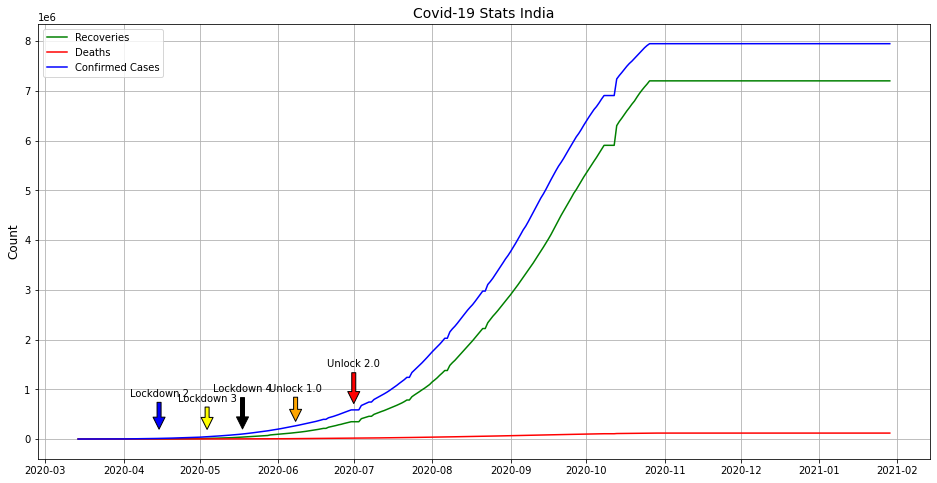

In [ ]:
date_data.index = pd.to_datetime(date_data['day'])
months = mdates.MonthLocator()

#plot deaths over time.
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(date_data['total.recovered'], color='green')
ax.plot(date_data['total.deaths'], color='red')
ax.plot(date_data['total.confirmed'], color='blue')
plt.ylabel("Count", fontsize = 12)
plt.title('Covid-19 Stats India', fontsize = 14)
plt.legend(['Recoveries', 'Deaths', 'Confirmed Cases'],loc='best')
#format ticks
ax.xaxis.set_major_locator(months)
ax.grid(True)
ax.annotate('Lockdown 2', xy =(pd.to_datetime('2020-04-15'),166050), xytext=(pd.to_datetime('2020-04-15'),850000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =(pd.to_datetime('2020-05-04'),166050), xytext=(pd.to_datetime('2020-05-04'),750000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =(pd.to_datetime('2020-05-18'),166050), xytext=(pd.to_datetime('2020-05-18'),950000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =(pd.to_datetime('2020-06-08'),326050), xytext=(pd.to_datetime('2020-06-08'),950000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),)
ax.annotate('Unlock 2.0', xy =(pd.to_datetime('2020-07-01'),676050), xytext=(pd.to_datetime('2020-07-01'),1450000),ha='center',
                arrowprops = dict(facecolor ='red',shrink = 0.05),)
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
vacc = pd.read_csv('country_vaccinations.csv')

In [ ]:
vacc.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [ ]:
vacc_ind = vacc[vacc['country'] == 'India']

In [ ]:
vacc_ind

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
660,India,IND,2021-01-15,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
661,India,IND,2021-01-16,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,139.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
662,India,IND,2021-01-17,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,81.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
663,India,IND,2021-01-18,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,110.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
664,India,IND,2021-01-19,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,122.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
665,India,IND,2021-01-20,806484.0,806484.0,NaN,131649.0,161297.0,0.06,0.06,NaN,117.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
666,India,IND,2021-01-21,1043534.0,1043534.0,NaN,237050.0,173922.0,0.08,0.08,NaN,126.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
667,India,IND,2021-01-22,1390592.0,1390592.0,NaN,347058.0,198656.0,0.10,0.10,NaN,144.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
668,India,IND,2021-01-23,1582201.0,1582201.0,NaN,191609.0,198717.0,0.11,0.11,NaN,144.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
669,India,IND,2021-01-24,1615504.0,1615504.0,NaN,33303.0,198743.0,0.12,0.12,NaN,144.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/


In [ ]:
vacc_ind[['date','total_vaccinations','daily_vaccinations']]

,date,total_vaccinations,daily_vaccinations
660,2021-01-15,0.0,NaN
661,2021-01-16,191181.0,191181.0
662,2021-01-17,224301.0,112150.0
663,2021-01-18,454049.0,151350.0
664,2021-01-19,674835.0,168709.0
665,2021-01-20,806484.0,161297.0
666,2021-01-21,1043534.0,173922.0
667,2021-01-22,1390592.0,198656.0
668,2021-01-23,1582201.0,198717.0
669,2021-01-24,1615504.0,198743.0


In [ ]:
vacc_ind['dd'] = vacc_ind['people_vaccinated'] - vacc_ind['daily_vaccinations']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
date_data_mod = date_data[date_data['day'] >= '2021-01-15']

In [ ]:
date_data_mod

,day,total.confirmed,total.deaths,total.recovered
day,,,,
2021-01-15,2021-01-15,7945975,119538,7198877
2021-01-16,2021-01-16,7945975,119538,7198877
2021-01-17,2021-01-17,7945975,119538,7198877
2021-01-18,2021-01-18,7945975,119538,7198877
2021-01-19,2021-01-19,7945975,119538,7198877
2021-01-20,2021-01-20,7945975,119538,7198877
2021-01-21,2021-01-21,7945975,119538,7198877
2021-01-22,2021-01-22,7945975,119538,7198877
2021-01-23,2021-01-23,7945975,119538,7198877


In [ ]:
final_data['td'] = final_data['total'] - final_data['discharged'] - final_data['deaths']

In [ ]:
final_data

,day,total,deaths,discharged,td
0,2020-03-10,47,0,0,47
1,2020-03-11,60,0,0,60
2,2020-03-12,73,0,0,73
3,2020-03-13,82,2,10,70
4,2020-03-14,84,2,10,72
...,...,...,...,...,...
321,2021-01-25,10667736,153470,10330084,184182
322,2021-01-26,10676838,153587,10345985,177266
323,2021-01-27,10689527,153724,10359305,176498
324,2021-01-28,10701193,153847,10373606,173740


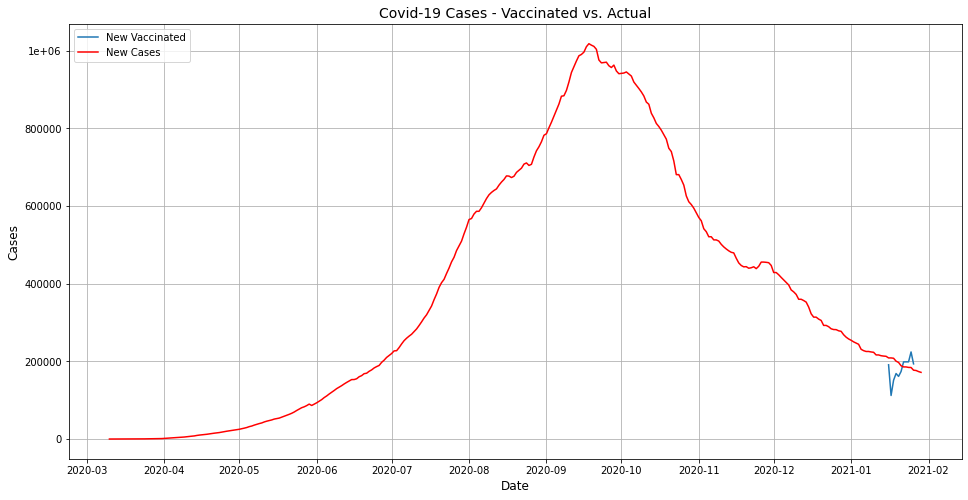

In [ ]:
import matplotlib.ticker as ticker
vacc_ind.index = pd.to_datetime(vacc_ind['date'])
final_data.index = pd.to_datetime(final_data['day'])

fig, ax = plt.subplots(figsize = (16,8))
ax.plot(vacc_ind['daily_vaccinations'], linestyle = '-', label = 'New Vaccinated')
ax.plot(final_data['td'] , linestyle = '-', label = 'New Cases', color = 'r')
plt.ylabel("Cases", fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Covid-19 Cases - Vaccinated vs. Actual', fontsize = 14)
ax.legend(loc='upper left')

ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6*1e6))
ax.yaxis.set_major_formatter(ticks)
ymin, ymax = plt.ylim()
scale_factor = 1
plt. ylim(ymin * scale_factor, ymax * scale_factor)

#ax.patch.set_facecolor('grey')
#ax.patch.set_alpha(0.2)

#Format ticks
#ax.xaxis.set_major_locator(months)
ax.grid(True)

plt.show()

In [ ]:
confirmed1 = pd.DataFrame(final_data[['day','td']])

confirmed1.tail()
confirmed1.columns = ['ds', 'y']

In [ ]:
confirmed2 = pd.DataFrame(vacc_ind[['date','daily_vaccinations']])

confirmed2.tail()
confirmed2.columns = ['ds', 'y']

In [ ]:
model2 = Prophet(interval_width = 0.95)
model2.fit(confirmed2)
future2 = model2.make_future_dataframe(periods=32)
forecast2 = model2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(32)

In [ ]:
model1 = Prophet(interval_width = 0.95)
model1.fit(confirmed1)
future1 = model1.make_future_dataframe(periods=32)
forecast1 = model1.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(32)

In [ ]:
model1.params

In [ ]:
model2.params

{'beta': array([[1.2465694e-15]]),
 'delta': array([[-1.12800232e-10,  1.62211879e-10, -1.06544368e-10,
         -1.35221771e-10,  1.70711352e-11,  7.40733485e-11,
         -1.38496518e-10]]),
 'k': array([[0.28368121]]),
 'm': array([[0.65777287]]),
 'sigma_obs': array([[0.09298485]]),
 'trend': array([[0.65777287, 0.68614099, 0.71450911, 0.74287724, 0.77124536,
         0.79961348, 0.8279816 , 0.85634972, 0.88471784, 0.91308596,
         0.94145408]])}

In [ ]:
pred_fut_cases = forecast1[['ds', 'yhat']]
#pred_cases['ds'] = pd.to_datetime(pred_cases['ds'])
pred_fut_cases.set_index('ds', inplace=True)

In [ ]:
pred_fut_vacc = forecast2[['ds', 'yhat']]
#pred_cases['ds'] = pd.to_datetime(pred_cases['ds'])
pred_fut_vacc.set_index('ds', inplace=True)

In [ ]:
confirmed3 = pd.DataFrame(vacc_ind[['date','total_vaccinations']])
confirmed3.tail()
confirmed3.columns = ['ds', 'y']

In [ ]:
model3 = Prophet(interval_width = 0.95)
model3.fit(confirmed3)
future3 = model3.make_future_dataframe(periods=20)
forecast3 = model3.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

In [ ]:
pred_fut_vacc_tot = forecast3[['ds', 'yhat']]
#pred_cases['ds'] = pd.to_datetime(pred_cases['ds'])
pred_fut_vacc_tot.set_index('ds', inplace=True)

In [ ]:

vacc_ind.index = pd.to_datetime(vacc_ind['date'])
final_data.index = pd.to_datetime(final_data['day'])

fig, ax = plt.subplots(figsize = (16,8))
ax.plot(vacc_ind['daily_vaccinations'], linestyle = '-', label = 'New Vaccinated')
ax.plot(final_data['total'] , linestyle = '-', label = 'New Cases', color = 'r')
ax.plot(pred_fut_vacc_tot , linestyle = '-', label = 'New Pred Cases', color = 'g')
plt.ylabel("Cases", fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Covid-19 Cases - Vaccinated vs. Actual', fontsize = 14)
ax.legend(loc='upper left')

#ax.patch.set_facecolor('grey')
#ax.patch.set_alpha(0.2)

ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6*1e6))
ax.yaxis.set_major_formatter(ticks)
ymin, ymax = plt.ylim()
scale_factor = 1
plt. ylim(ymin * scale_factor, ymax * scale_factor)

#Format ticks
#ax.xaxis.set_major_locator(months)
ax.grid(True)

plt.show()

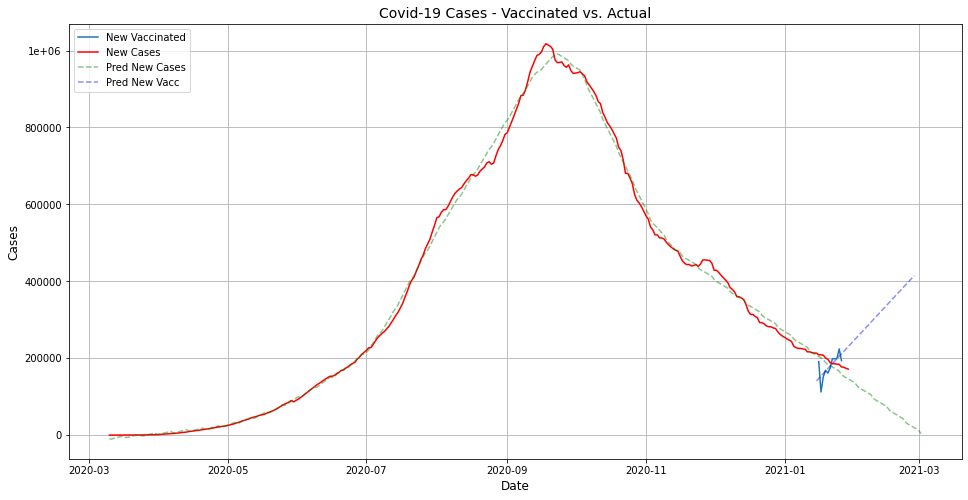

In [ ]:
import matplotlib.ticker as ticker
vacc_ind.index = pd.to_datetime(vacc_ind['date'])
final_data.index = pd.to_datetime(final_data['day'])

fig, ax = plt.subplots(figsize = (16,8))
ax.plot(vacc_ind['daily_vaccinations'], linestyle = '-', label = 'New Vaccinated')
ax.plot(final_data['td'] , linestyle = '-', label = 'New Cases', color = 'r')
ax.plot(pred_fut_cases , linestyle = '--', label = 'Pred New Cases', color = 'g', alpha =0.45)
ax.plot(pred_fut_vacc , linestyle = '--', label = 'Pred New Vacc', color = 'b', alpha =0.45)
plt.ylabel("Cases", fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Covid-19 Cases - Vaccinated vs. Actual', fontsize = 14)
ax.legend(loc='upper left')

#ax.patch.set_facecolor('grey')
#ax.patch.set_alpha(0.2)

ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6*1e6))
ax.yaxis.set_major_formatter(ticks)
ymin, ymax = plt.ylim()
scale_factor = 1
plt. ylim(ymin * scale_factor, ymax * scale_factor)

#Format ticks
#ax.xaxis.set_major_locator(months)
ax.grid(True)

plt.show()